# A DL model with Keras

In this notebook:
* How to load a CSV dataset ready for use with Keras.
* How to define and compile a Multilayer Perceptron model in Keras.   How to evaluate a Keras model on a validation dataset.

## The steps

There is not a lot of code required, but we are going to step over it slowly so that you will know how to create your own models in the future. The steps you are going to cover in this tutorial are as follows:
1. Load Data.
2. Define Model.
3. Compile Model.
4. Fit Model.
5. Evaluate Model.
6. Tie It All Together.

## The dataset

We will use the Pima Indians Onset of Diabetes Dataset.

Given that all attributes are numerical, this makes it easy to use directly with NN that expect numerical inputs and output values, and ideal for our first NN in Keras. 

Now we can reveal how good you can get here!

The baseline accuracy if all predictions are made as no onset of diabetes is 65.1%. Top results on the dataset are in the range of 77.7% accuracy using 10-fold cross-validation ([here](http://www.is.umk.pl/projects/datasets.html#Diabetes) - apologies, broken link now, will find a new one). 

## Load Data

Whenever we work with machine learning algorithms that use a stochastic process (e.g. random numbers), it is a good idea to initialize the random number generator with a fixed seed value. This is so that you can run the same code again and again and get the same result. This is useful if you need to demonstrate a result, compare algorithms using the same source of randomness or to debug a part of your code. You can initialize the random number generator with any seed you like, for example:

In [1]:
from keras.models import Sequential
from keras.layers import Dense
import numpy
# fix random seed for reproducibility
numpy.random.seed(7)

Using TensorFlow backend.


Now we can load our Pima Indians dataset. You can now load the file directly using the NumPy function `loadtxt()`. There are eight input variables and one output variable (the last column). Once loaded we can split the dataset into input variables (X) and the output class variable (Y ).

In [2]:
# load pima indians dataset
dataset = numpy.loadtxt("pima-indians-diabetes.data.csv", delimiter=",")
# split into input and output variables
X = dataset[:,0:8]
Y = dataset[:,8]

We are now ready to define our neural network model.

## Define Model

Models in Keras are defined as a sequence of layers. **We create a Sequential model and add layers one at a time until we are happy with our network topology**. The first thing to get right is to ensure the input layer has the right number of inputs. This can be specified when creating the first layer with the input dim argument and setting it to 8 for the 8 input variables.

**How do we know the number of layers to use and their types?** This is a very hard question. There are heuristics that we can use but most often the best network structure is found through a process of trial and error experimentation. Generally, _you need a network large enough to capture the structure of the problem_ if that helps at all. In this example we will use _a fully-connected network structure with three layers_.

**Fully connected layers are defined using the Dense class**:
* We can specify the number of neurons in the layer as the first argument
* we can specify the activation function using the activation argument.
* We will use the rectifier (relu) activation function on the first two layers and the sigmoid activation function in the output layer.
* We use a sigmoid activation function on the output layer to ensure our network output is between 0 and 1 and easy to map to either a probability of class 1 or snap to a hard classification of either class with a default threshold of 0.5. 

Why relu? It used to be the case that sigmoid and tanh activation functions were preferred for all layers. These days, better performance is seen using the relu. 

We can piece it all together by adding each layer. The first hidden layer has 12 neurons and expects 8 input variables (e.g. input dim=8). The second hidden layer has 8 neurons and finally the output layer has 1 neuron to predict the class (onset of diabetes or not).

In [3]:
# create model
model = Sequential()
model.add(Dense(12, input_dim=8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [4]:
model

The figure below provides a depiction of the network structure.

<img src="NNstructure.png" style="width:200px"/>

## Compile Model

Now that the model is defined, we can compile it. 

Compiling the model uses the efficient numerical libraries under the covers (the so-called backend) such as Theano or TensorFlow. **The backend automatically chooses the best way to represent the network for training and making predictions to run on your hardware**.

When compiling, we must specify some additional properties required when training the network. Remember training a network means finding the best set of weights to make predictions for this problem.

We must specify the **loss function** to use to evaluate a set of weights, the **optimizer** used to search through different weights for the network and **any optional metrics** we would like to collect and report during training. 

In this case we will use **logarithmic loss**, which for a binary classification problem is defined in Keras as the **binary crossentropy**. 

We will also use the efficient **gradient descent algorithm Adam** for no other reason that it is an efficient default. Learn more about the Adam optimization algorithm in the paper [Adam: A Method for Stochastic Optimization](http://arxiv.org/abs/1412.6980). 

Finally, because it is a classification problem, we will collect and report the classification **accuracy** as the metric.

In [5]:
# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [6]:
model

## Fit Model

We have defined our model and compiled it ready for efficient computation. Now it is time to execute the model on some data. We can train or fit our model on our loaded data by calling the $fit()$ function on the model.

The training process will run for a fixed number of iterations through the dataset called **epochs**, that we must specify using the epochs argument. 

We can also set the number of instances that are evaluated before a weight update in the network is performed called the **batch size** and set it using the $batch size$ argument. 

For this problem we will run for a small number of epochs (150) and use a relatively small batch size of 10. Again, these can be chosen experimentally by trial and error.

In [7]:
# Fit the model
model.fit(X, Y, epochs=150, batch_size=10)

Epoch 1/150
768/768 [==============================] - 0s - loss: 3.7501 - acc: 0.6003     
Epoch 2/150
768/768 [==============================] - 0s - loss: 0.9434 - acc: 0.5951     
Epoch 3/150
768/768 [==============================] - 0s - loss: 0.7512 - acc: 0.6367     
Epoch 4/150
768/768 [==============================] - 0s - loss: 0.7130 - acc: 0.6536     
Epoch 5/150
768/768 [==============================] - 0s - loss: 0.6823 - acc: 0.6758     
Epoch 6/150
768/768 [==============================] - 0s - loss: 0.6506 - acc: 0.6849     
Epoch 7/150
768/768 [==============================] - 0s - loss: 0.6494 - acc: 0.6745     
Epoch 8/150
768/768 [==============================] - 0s - loss: 0.6371 - acc: 0.6875     
Epoch 9/150
768/768 [==============================] - 0s - loss: 0.6237 - acc: 0.6901     
Epoch 10/150
768/768 [==============================] - 0s - loss: 0.6299 - acc: 0.6745     
Epoch 11/150
768/768 [==============================] - 0s - loss: 0.6450 - acc

768/768 [==============================] - 0s - loss: 0.5077 - acc: 0.7591     
Epoch 90/150
768/768 [==============================] - 0s - loss: 0.5101 - acc: 0.7526     
Epoch 91/150
768/768 [==============================] - 0s - loss: 0.5040 - acc: 0.7513     
Epoch 92/150
768/768 [==============================] - 0s - loss: 0.5072 - acc: 0.7409     
Epoch 93/150
768/768 [==============================] - 0s - loss: 0.4992 - acc: 0.7643     
Epoch 94/150
768/768 [==============================] - 0s - loss: 0.4999 - acc: 0.7630     
Epoch 95/150
768/768 [==============================] - 0s - loss: 0.5054 - acc: 0.7500     
Epoch 96/150
768/768 [==============================] - 0s - loss: 0.4937 - acc: 0.7656     
Epoch 97/150
768/768 [==============================] - 0s - loss: 0.4985 - acc: 0.7721     
Epoch 98/150
768/768 [==============================] - 0s - loss: 0.4906 - acc: 0.7604     
Epoch 99/150
768/768 [==============================] - 0s - loss: 0.4925 - acc: 0.

_NOTE: This is where the work happens on your CPU or GPU._

## Evaluate Model

We have trained our neural network on the entire dataset and we can evaluate the performance of the network on the same dataset. This will only give us an idea of how well we have modeled the dataset (e.g. train accuracy), but no idea of how well the algorithm might perform on new data. We have done this for simplicity here - and YOU KNOW HOW TO DEAL WITH THIS PROBLEM - but ideally, you should separate your data into train and test datasets for the training and evaluation of your model.

You can evaluate your model on your training dataset using the evaluation() function on your model and pass it the same input and output used to train the model. This will generate a prediction for each input and output pair and collect scores, including the average loss and any metrics you have configured, such as accuracy.

In [8]:
# evaluate the model
scores = model.evaluate(X, Y)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

 32/768 [>.............................] - ETA: 0s
acc: 79.43%


## Tie It All Together

You have just seen how you can easily create your first neural network model in Keras. Let’s tie it all together into a complete code example.

In [9]:
# Create your first MLP in Keras
from keras.models import Sequential
from keras.layers import Dense
import numpy
# fix random seed for reproducibility
numpy.random.seed(7)
# load pima indians dataset
dataset = numpy.loadtxt("pima-indians-diabetes.data.csv", delimiter=",")
# split into input (X) and output (Y) variables
X = dataset[:,0:8]
Y = dataset[:,8]
# create model
model = Sequential()
model.add(Dense(12, input_dim=8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy']) # Fit the model
model.fit(X, Y, epochs=150, batch_size=10)
# evaluate the model
scores = model.evaluate(X, Y)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

Epoch 1/150
768/768 [==============================] - 0s - loss: 3.7417 - acc: 0.5990     
Epoch 2/150
768/768 [==============================] - 0s - loss: 0.9419 - acc: 0.5911     
Epoch 3/150
768/768 [==============================] - 0s - loss: 0.7495 - acc: 0.6445     
Epoch 4/150
768/768 [==============================] - 0s - loss: 0.7123 - acc: 0.6576     
Epoch 5/150
768/768 [==============================] - 0s - loss: 0.6817 - acc: 0.6771     
Epoch 6/150
768/768 [==============================] - 0s - loss: 0.6505 - acc: 0.6784     
Epoch 7/150
768/768 [==============================] - 0s - loss: 0.6497 - acc: 0.6784     
Epoch 8/150
768/768 [==============================] - 0s - loss: 0.6384 - acc: 0.6875     
Epoch 9/150
768/768 [==============================] - 0s - loss: 0.6247 - acc: 0.6966     
Epoch 10/150
768/768 [==============================] - 0s - loss: 0.6309 - acc: 0.6745     
Epoch 11/150
768/768 [==============================] - 0s - loss: 0.6464 - acc

768/768 [==============================] - 0s - loss: 0.5028 - acc: 0.7643     
Epoch 89/150
768/768 [==============================] - 0s - loss: 0.5073 - acc: 0.7578     
Epoch 90/150
768/768 [==============================] - 0s - loss: 0.5104 - acc: 0.7474     
Epoch 91/150
768/768 [==============================] - 0s - loss: 0.5032 - acc: 0.7474     
Epoch 92/150
768/768 [==============================] - 0s - loss: 0.5116 - acc: 0.7448     
Epoch 93/150
768/768 [==============================] - 0s - loss: 0.5019 - acc: 0.7578     
Epoch 94/150
768/768 [==============================] - 0s - loss: 0.4990 - acc: 0.7604     
Epoch 95/150
768/768 [==============================] - 0s - loss: 0.5083 - acc: 0.7422     
Epoch 96/150
768/768 [==============================] - 0s - loss: 0.4927 - acc: 0.7643     
Epoch 97/150
768/768 [==============================] - 0s - loss: 0.4991 - acc: 0.7734     
Epoch 98/150
768/768 [==============================] - 0s - loss: 0.4925 - acc: 0.

Exercise into using this code from notebooks to actual py script that you run via a shell.

Running this example, you should see a message for each of the 150 epochs printing the loss and accuracy for each, followed by the final evaluation of the trained model on the training dataset. It takes about 30 seconds to execute on my workstation running on the CPU with a TF backend.

## Visualize the training history

Epoch 1/150
768/768 [==============================] - 0s - loss: 0.4236 - acc: 0.8138     
Epoch 2/150
768/768 [==============================] - 0s - loss: 0.4238 - acc: 0.7995     
Epoch 3/150
768/768 [==============================] - 0s - loss: 0.4323 - acc: 0.7995     
Epoch 4/150
768/768 [==============================] - 0s - loss: 0.4294 - acc: 0.8008     
Epoch 5/150
768/768 [==============================] - 0s - loss: 0.4294 - acc: 0.8086     
Epoch 6/150
768/768 [==============================] - 0s - loss: 0.4262 - acc: 0.8008     
Epoch 7/150
768/768 [==============================] - 0s - loss: 0.4305 - acc: 0.7982     
Epoch 8/150
768/768 [==============================] - 0s - loss: 0.4197 - acc: 0.8125     
Epoch 9/150
768/768 [==============================] - 0s - loss: 0.4257 - acc: 0.8086     
Epoch 10/150
768/768 [==============================] - 0s - loss: 0.4169 - acc: 0.8073     
Epoch 11/150
768/768 [==============================] - 0s - loss: 0.4184 - acc

768/768 [==============================] - 0s - loss: 0.4244 - acc: 0.8086     
Epoch 89/150
768/768 [==============================] - 0s - loss: 0.4123 - acc: 0.8216     
Epoch 90/150
768/768 [==============================] - 0s - loss: 0.4073 - acc: 0.8125     
Epoch 91/150
768/768 [==============================] - 0s - loss: 0.4179 - acc: 0.8125     
Epoch 92/150
768/768 [==============================] - 0s - loss: 0.4114 - acc: 0.8177     
Epoch 93/150
768/768 [==============================] - 0s - loss: 0.4272 - acc: 0.7969     
Epoch 94/150
768/768 [==============================] - 0s - loss: 0.4076 - acc: 0.8177     
Epoch 95/150
768/768 [==============================] - 0s - loss: 0.4112 - acc: 0.8138     
Epoch 96/150
768/768 [==============================] - 0s - loss: 0.4015 - acc: 0.8164     
Epoch 97/150
768/768 [==============================] - 0s - loss: 0.4186 - acc: 0.8125     
Epoch 98/150
768/768 [==============================] - 0s - loss: 0.4059 - acc: 0.

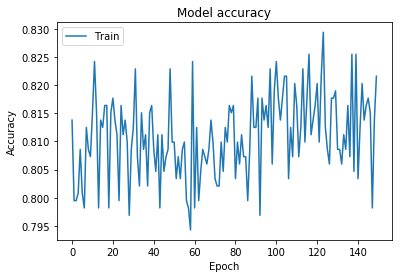

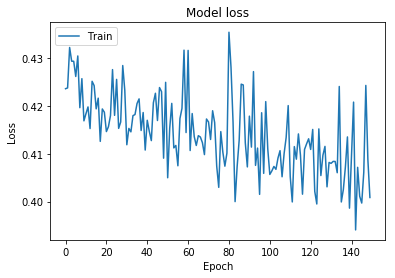

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline 

history = model.fit(X, Y, epochs=150, batch_size=10)

# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


## Visualize a NN model in Keras

Simplest (not graphical, though) is:

In [15]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 12)                108       
_________________________________________________________________
dense_5 (Dense)              (None, 8)                 104       
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 9         
Total params: 221
Trainable params: 221
Non-trainable params: 0
_________________________________________________________________
None


Additionally, you can dump your model architecture into a file:

    from keras.utils import plot_model
    plot_model(model, to_file='model.png')
    #plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)  

Another way is:

    from IPython.display import SVG
    from keras.utils.vis_utils import model_to_dot
    SVG(model_to_dot(model).create(prog='dot', format='svg'))

Note that - in both cases - these work only if you have installed:

    pydot
    graphviz

(and related dependencies). Steps:

 * conda install graphviz    <-- this installs the binaries, in <your-anaconda-path>\Library\bin\graphviz\
 * you need to add that path to your system PATH
 * pip install graphviz      <-- this installs the graphviz py package as well
 * pip install pydot-ng      <-- you need pydot but the original pydot package has issues. Use pydot-ng
    
Now you should be ready to visualize.

## Summary

What we learned:

* we discovered how to create your first neural network model using the powerful Keras Python library for deep learning. 
* Specifically you learned the five key steps in using Keras to create a neural network or deep learning model, step-by-step including:

    1. How to load data.
    2. How to define a neural network model in Keras.
    3. How to compile a Keras model using the efficient numerical backend.   How to train a model on data.
    4. How to evaluate a model on data.

## What's next 

Discover different ways that you can evaluate your models and estimate their performance on unseen data.